In [4]:
import os, datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
    
from tensorflow import keras
from tensorflow.keras import layers


In [5]:
df = pd.read_csv("./data/Life_Expectancy_Data.csv")

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.shape

(2938, 22)

In [7]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Fill the missong values

In [15]:
countries = df['Country'].unique()

na_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 
           'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 
           'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years',
           ' thinness 5-9 years', 'Income composition of resources',
           'Income composition of resources', 'Schooling']

for col in na_cols:
    for country in countries:
        df.loc[df['Country'] == country, col] = df.loc[df['Country'] == country, col].fillna(df[df['Country'] == country][col].mean())

In [16]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [17]:
df = df.dropna()

In [19]:
df.shape

(2128, 22)

In [20]:
df['Status'].value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

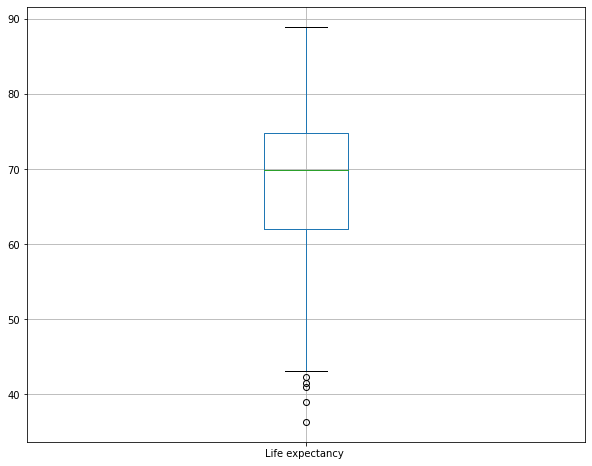

In [21]:
plt.figure(figsize=(10, 8))

df.boxplot('Life expectancy ')
plt.show()

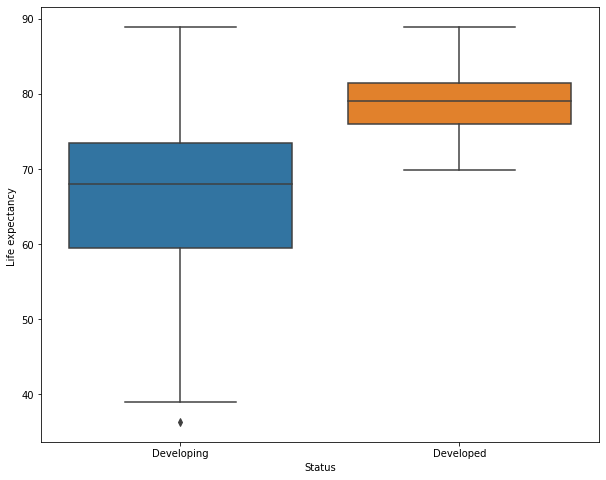

In [22]:
plt.figure(figsize=(10,8))

sns.boxplot('Status', 'Life expectancy ', data=df)
plt.show()

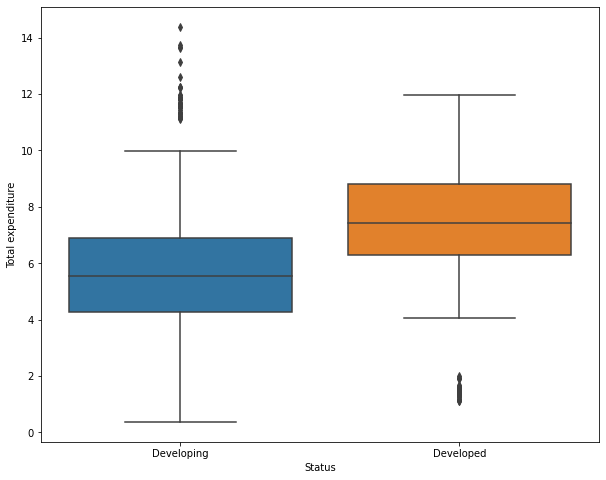

In [23]:
plt.figure(figsize=(10,8))

sns.boxplot('Status', 'Total expenditure', data=df)
plt.show()

In [26]:
df_corr = df[['Life expectancy ',
             'Adult Mortality',
             'Schooling',
             'Total expenditure',
             'Diphtheria ',
             'GDP',
             'Population']].corr()
df_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.746619,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.408661,-0.097938,-0.212157,-0.259500,-0.021050
Schooling,0.746619,-0.408661,1.000000,0.261679,0.432891,0.471767,-0.022453
Total expenditure,0.203689,-0.097938,0.261679,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.432891,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.471767,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.022453,-0.079752,-0.024167,-0.016800,1.000000


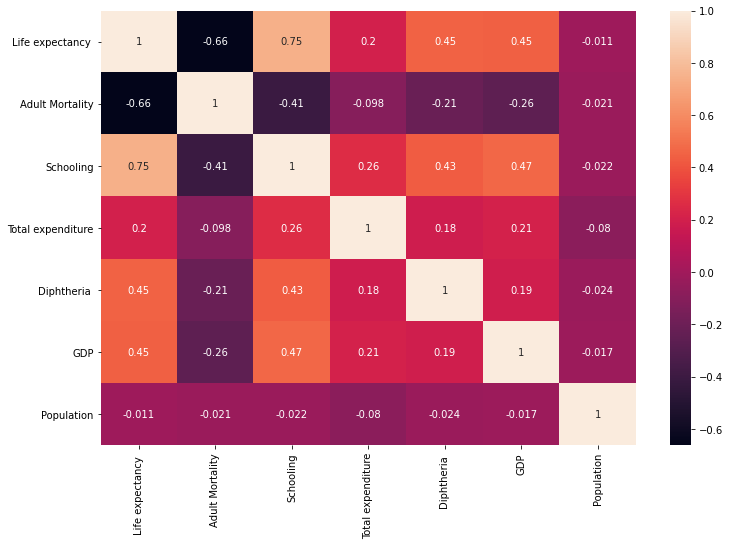

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df_corr, annot=True)
plt.show()

In [28]:
features = df.drop('Life expectancy ', axis=1)
target = df[['Life expectancy ']]

In [29]:
features = features.drop('Country', axis=1)

In [30]:
categorical_features = features['Status'].copy()

In [31]:
categorical_features = pd.get_dummies(categorical_features)

In [32]:
numeric_features = features.drop(['Status'], axis=1)

In [33]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [34]:
standarScaler = StandardScaler()
numeric_features = pd.DataFrame(standarScaler.fit_transform(numeric_features),
                               columns = numeric_features.columns,
                               index = numeric_features.index)
numeric_features.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,2128.0,0.000000e+00,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,-5.342427e-17,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,0.000000e+00,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,1.402387e-16,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,1.335607e-17,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,3.005115e-17,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,0.000000e+00,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,4.674623e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.669508e-17,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,8.347542e-17,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [35]:
processed_feature = pd.concat([numeric_features, categorical_features],
                              axis=1,
                             sort=False)


In [36]:
processed_feature.shape

(2128, 21)

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_feature,
                                                   target,
                                                   test_size=0.2,
                                                   random_state=1)

In [38]:
def build_single_layer_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32,
                                   input_shape = (x_train.shape[1],),
                                   activation = 'sigmoid'))
    model.add(tf.keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(loss = 'mse',
                 metrics = ['mse', 'mae'],
                 optimizer = optimizer)
    return model

In [39]:
model = build_single_layer_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


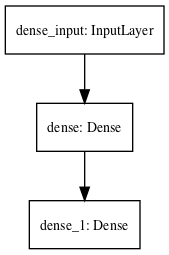

In [40]:
tf.keras.utils.plot_model(model)

In [41]:
num_epochs = 100
training_history = model.fit(x_train,
                            y_train,
                            epochs = num_epochs,
                            validation_split = 0.2,
                            verbose = True)

Epoch 1/100
43/43 [==============================] - 0s 4ms/step - loss: 4139.5762 - mse: 4139.5762 - mae: 63.6336 - val_loss: 3506.8167 - val_mse: 3506.8167 - val_mae: 58.5679
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 2814.9019 - mse: 2814.9019 - mae: 52.1408 - val_loss: 2075.8018 - val_mse: 2075.8018 - val_mae: 44.6746
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 1504.8641 - mse: 1504.8641 - mae: 37.4700 - val_loss: 994.1245 - val_mse: 994.1245 - val_mae: 30.2544
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 682.2428 - mse: 682.2428 - mae: 24.4209 - val_loss: 428.0690 - val_mse: 428.0690 - val_mae: 18.9506
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 288.3427 - mse: 288.3427 - mae: 15.0286 - val_loss: 183.5626 - val_mse: 183.5626 - val_mae: 11.7285
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 127.5419 - mse: 127.5419 - mae: 9.5729 - val_loss: 9

43/43 [==============================] - 0s 1ms/step - loss: 6.2831 - mse: 6.2831 - mae: 1.7879 - val_loss: 7.9225 - val_mse: 7.9225 - val_mae: 1.9495
Epoch 51/100
43/43 [==============================] - 0s 1ms/step - loss: 6.1972 - mse: 6.1972 - mae: 1.7712 - val_loss: 7.8931 - val_mse: 7.8931 - val_mae: 1.9595
Epoch 52/100
43/43 [==============================] - 0s 1ms/step - loss: 6.1489 - mse: 6.1489 - mae: 1.7634 - val_loss: 7.6553 - val_mse: 7.6553 - val_mae: 1.9137
Epoch 53/100
43/43 [==============================] - 0s 1ms/step - loss: 6.1121 - mse: 6.1121 - mae: 1.7643 - val_loss: 7.6173 - val_mse: 7.6173 - val_mae: 1.8988
Epoch 54/100
43/43 [==============================] - 0s 1ms/step - loss: 6.0470 - mse: 6.0470 - mae: 1.7334 - val_loss: 7.5715 - val_mse: 7.5715 - val_mae: 1.8966
Epoch 55/100
43/43 [==============================] - 0s 1ms/step - loss: 6.0047 - mse: 6.0047 - mae: 1.7455 - val_loss: 7.6375 - val_mse: 7.6375 - val_mae: 1.9050
Epoch 56/100
43/43 [=========

43/43 [==============================] - 0s 1ms/step - loss: 4.3977 - mse: 4.3977 - mae: 1.4948 - val_loss: 6.0792 - val_mse: 6.0792 - val_mae: 1.7112


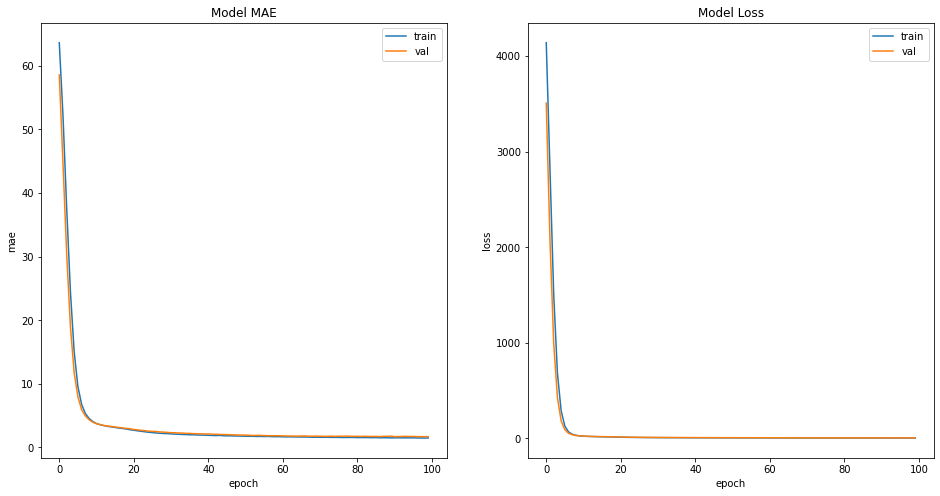

In [42]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

In [43]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 539us/step - loss: 6.1192 - mse: 6.1192 - mae: 1.7913


[6.1191887855529785, 6.1191887855529785, 1.791335940361023]

In [45]:
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

0.932210726894215

In [46]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                            'y_pred': y_pred.flatten()},
                           index = range(len(y_pred)))

pred_results.head()

,y_test,y_pred
0,75.1,77.710648
1,76.3,73.487198
2,73.9,72.861710
3,75.4,75.716812
4,68.3,69.862328


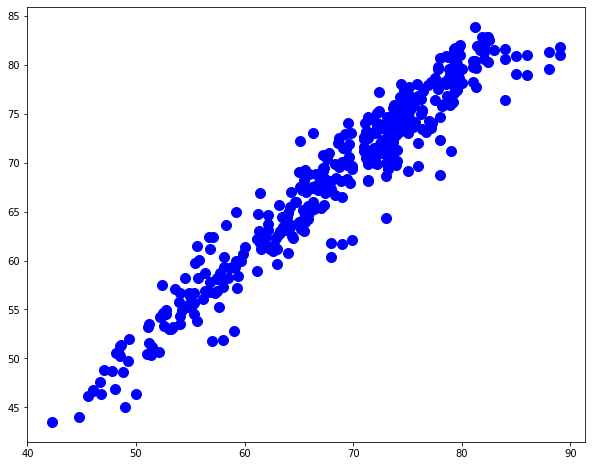

In [47]:
plt.figure(figsize=(10,8))

plt.scatter(y_test, y_pred, s=100, c='blue')

plt.show()

### Multiple layer model

In [54]:
def build_multiple_layer_model():
    model = keras.Sequential([layers.Dense(32, 
                                           input_shape = (x_train.shape[1],),
                                          activation = 'relu'),
                             layers.Dense(16, activation = 'relu'),
                             layers.Dense(4, activation = 'relu'),
                             layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
    return model

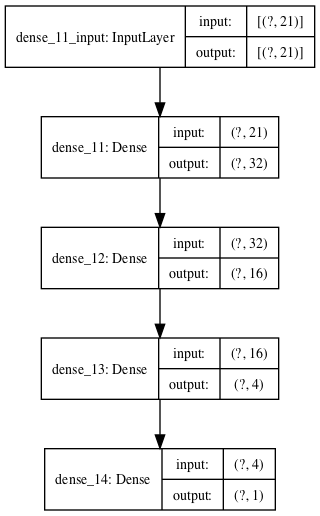

In [55]:
model = build_multiple_layer_model()

tf.keras.utils.plot_model(model, show_shapes=True)

In [57]:
!rm -rf logs
!ls -l

total 800
-rw-r--r--  1 gshilpa  staff    2994 Sep  6 00:54 EagerExecution.ipynb
-rw-r--r--  1 gshilpa  staff    2166 Sep  6 22:47 GradientTape.ipynb
-rw-r--r--  1 gshilpa  staff  107938 Sep  7 00:31 LinearRegression.ipynb
-rw-r--r--  1 gshilpa  staff  243295 Sep  7 02:08 SequentialModel.ipynb
-rw-r--r--  1 gshilpa  staff    6395 Aug 31 01:54 TensorAndVariables.ipynb
-rw-r--r--  1 gshilpa  staff   10446 Sep  6 00:43 V1Session.ipynb
drwxr-xr-x  3 gshilpa  staff      96 Sep  7 01:00 data
-rw-r--r--  1 gshilpa  staff   19173 Sep  7 02:08 model.png
-rw-r--r--  1 gshilpa  staff    1493 Sep  6 01:12 tfFunction.ipynb


In [59]:
logdir = os.path.join("seq_logs", 
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [60]:
training_histroy = model.fit(x_train,
                            y_train,
                            validation_split = 0.2,
                            epochs = 500,
                            batch_size = 100,
                            callbacks = [tensorboard_callback])

Epoch 1/500
 1/14 [=>............................] - ETA: 0s - loss: 4680.5898 - mae: 67.6346 - mse: 4680.5898WARNING:tensorflow:From /Users/gshilpa/anaconda3/envs/study/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
14/14 [==============================] - 0s 14ms/step - loss: 4621.3516 - mae: 67.2604 - mse: 4621.3516 - val_loss: 4344.4624 - val_mae: 65.1198 - val_mse: 4344.4624
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 3513.2859 - mae: 57.8401 - mse: 3513.2859 - val_loss: 2008.1012 - val_mae: 42.3851 - val_mse: 2008.1012
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 1035.2603 - mae: 26.8511 - mse: 1035.2603 - val_loss: 568.1364 - val_mae: 17.4003 - val_mse: 568.1364
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - lo

14/14 [==============================] - 0s 3ms/step - loss: 9.7778 - mae: 2.3147 - mse: 9.7778 - val_loss: 11.2362 - val_mae: 2.4756 - val_mse: 11.2362
Epoch 47/500
14/14 [==============================] - 0s 3ms/step - loss: 9.8403 - mae: 2.3603 - mse: 9.8403 - val_loss: 11.0555 - val_mae: 2.4300 - val_mse: 11.0555
Epoch 48/500
14/14 [==============================] - 0s 3ms/step - loss: 9.5185 - mae: 2.2716 - mse: 9.5185 - val_loss: 10.8371 - val_mae: 2.4050 - val_mse: 10.8371
Epoch 49/500
14/14 [==============================] - 0s 3ms/step - loss: 9.4442 - mae: 2.2734 - mse: 9.4442 - val_loss: 10.7272 - val_mae: 2.3794 - val_mse: 10.7272
Epoch 50/500
14/14 [==============================] - 0s 3ms/step - loss: 9.2528 - mae: 2.2419 - mse: 9.2528 - val_loss: 10.6252 - val_mae: 2.3607 - val_mse: 10.6252
Epoch 51/500
14/14 [==============================] - 0s 3ms/step - loss: 9.5125 - mae: 2.2867 - mse: 9.5125 - val_loss: 10.9681 - val_mae: 2.4424 - val_mse: 10.9681
Epoch 52/500
14/1

Epoch 96/500
14/14 [==============================] - 0s 3ms/step - loss: 7.9202 - mae: 2.0684 - mse: 7.9202 - val_loss: 9.0287 - val_mae: 2.1588 - val_mse: 9.0287
Epoch 97/500
14/14 [==============================] - 0s 4ms/step - loss: 8.2072 - mae: 2.1147 - mse: 8.2072 - val_loss: 8.9061 - val_mae: 2.1737 - val_mse: 8.9061
Epoch 98/500
14/14 [==============================] - 0s 3ms/step - loss: 7.9452 - mae: 2.0621 - mse: 7.9452 - val_loss: 8.7979 - val_mae: 2.1883 - val_mse: 8.7979
Epoch 99/500
14/14 [==============================] - 0s 3ms/step - loss: 7.9606 - mae: 2.0740 - mse: 7.9606 - val_loss: 8.9741 - val_mae: 2.1419 - val_mse: 8.9741
Epoch 100/500
14/14 [==============================] - 0s 3ms/step - loss: 7.8644 - mae: 2.0532 - mse: 7.8644 - val_loss: 9.0670 - val_mae: 2.1923 - val_mse: 9.0670
Epoch 101/500
14/14 [==============================] - 0s 3ms/step - loss: 8.2870 - mae: 2.1370 - mse: 8.2870 - val_loss: 9.0611 - val_mae: 2.1812 - val_mse: 9.0611
Epoch 102/500


Epoch 146/500
14/14 [==============================] - 0s 3ms/step - loss: 7.6200 - mae: 2.0450 - mse: 7.6200 - val_loss: 8.4414 - val_mae: 2.1474 - val_mse: 8.4414
Epoch 147/500
14/14 [==============================] - 0s 3ms/step - loss: 7.5868 - mae: 2.0197 - mse: 7.5868 - val_loss: 8.7285 - val_mae: 2.1549 - val_mse: 8.7285
Epoch 148/500
14/14 [==============================] - 0s 3ms/step - loss: 7.5900 - mae: 2.0161 - mse: 7.5900 - val_loss: 8.8239 - val_mae: 2.1872 - val_mse: 8.8239
Epoch 149/500
14/14 [==============================] - 0s 3ms/step - loss: 7.7453 - mae: 2.0412 - mse: 7.7453 - val_loss: 8.3046 - val_mae: 2.0914 - val_mse: 8.3046
Epoch 150/500
14/14 [==============================] - 0s 3ms/step - loss: 7.4989 - mae: 2.0057 - mse: 7.4989 - val_loss: 8.4277 - val_mae: 2.1131 - val_mse: 8.4277
Epoch 151/500
14/14 [==============================] - 0s 3ms/step - loss: 7.4032 - mae: 2.0067 - mse: 7.4032 - val_loss: 8.3861 - val_mae: 2.1206 - val_mse: 8.3861
Epoch 152/

14/14 [==============================] - 0s 3ms/step - loss: 7.3285 - mae: 2.0009 - mse: 7.3285 - val_loss: 8.3837 - val_mae: 2.1397 - val_mse: 8.3837
Epoch 196/500
14/14 [==============================] - 0s 3ms/step - loss: 7.2069 - mae: 1.9686 - mse: 7.2069 - val_loss: 8.2861 - val_mae: 2.0772 - val_mse: 8.2861
Epoch 197/500
14/14 [==============================] - 0s 3ms/step - loss: 7.3389 - mae: 1.9845 - mse: 7.3389 - val_loss: 8.5732 - val_mae: 2.1623 - val_mse: 8.5732
Epoch 198/500
14/14 [==============================] - 0s 3ms/step - loss: 7.6893 - mae: 2.0712 - mse: 7.6893 - val_loss: 8.4369 - val_mae: 2.1410 - val_mse: 8.4369
Epoch 199/500
14/14 [==============================] - 0s 3ms/step - loss: 7.6222 - mae: 2.0434 - mse: 7.6222 - val_loss: 8.4174 - val_mae: 2.1444 - val_mse: 8.4174
Epoch 200/500
14/14 [==============================] - 0s 3ms/step - loss: 7.4567 - mae: 2.0157 - mse: 7.4567 - val_loss: 8.6035 - val_mae: 2.1538 - val_mse: 8.6035
Epoch 201/500
14/14 [===

Epoch 245/500
14/14 [==============================] - 0s 2ms/step - loss: 7.1670 - mae: 1.9785 - mse: 7.1670 - val_loss: 8.3224 - val_mae: 2.0649 - val_mse: 8.3224
Epoch 246/500
14/14 [==============================] - 0s 2ms/step - loss: 7.3760 - mae: 1.9845 - mse: 7.3760 - val_loss: 8.4573 - val_mae: 2.0858 - val_mse: 8.4573
Epoch 247/500
14/14 [==============================] - 0s 2ms/step - loss: 6.9411 - mae: 1.9199 - mse: 6.9411 - val_loss: 8.1464 - val_mae: 2.0644 - val_mse: 8.1464
Epoch 248/500
14/14 [==============================] - 0s 2ms/step - loss: 7.3489 - mae: 1.9887 - mse: 7.3489 - val_loss: 8.8602 - val_mae: 2.2660 - val_mse: 8.8602
Epoch 249/500
14/14 [==============================] - 0s 2ms/step - loss: 7.4079 - mae: 1.9846 - mse: 7.4079 - val_loss: 8.2559 - val_mae: 2.0718 - val_mse: 8.2559
Epoch 250/500
14/14 [==============================] - 0s 3ms/step - loss: 6.8171 - mae: 1.9193 - mse: 6.8171 - val_loss: 8.7135 - val_mae: 2.2368 - val_mse: 8.7135
Epoch 251/

14/14 [==============================] - 0s 2ms/step - loss: 7.3999 - mae: 1.9806 - mse: 7.3999 - val_loss: 8.6978 - val_mae: 2.1705 - val_mse: 8.6979
Epoch 295/500
14/14 [==============================] - 0s 2ms/step - loss: 7.2011 - mae: 1.9769 - mse: 7.2011 - val_loss: 8.2647 - val_mae: 2.0857 - val_mse: 8.2647
Epoch 296/500
14/14 [==============================] - 0s 2ms/step - loss: 6.8124 - mae: 1.8966 - mse: 6.8124 - val_loss: 8.3719 - val_mae: 2.1011 - val_mse: 8.3719
Epoch 297/500
14/14 [==============================] - 0s 2ms/step - loss: 7.0906 - mae: 1.9600 - mse: 7.0906 - val_loss: 9.1327 - val_mae: 2.1221 - val_mse: 9.1327
Epoch 298/500
14/14 [==============================] - 0s 2ms/step - loss: 7.2517 - mae: 1.9728 - mse: 7.2517 - val_loss: 8.4149 - val_mae: 2.1534 - val_mse: 8.4149
Epoch 299/500
14/14 [==============================] - 0s 2ms/step - loss: 7.7920 - mae: 2.0708 - mse: 7.7920 - val_loss: 8.4407 - val_mae: 2.1216 - val_mse: 8.4407
Epoch 300/500
14/14 [===

Epoch 344/500
14/14 [==============================] - 0s 2ms/step - loss: 9.5831 - mae: 2.3573 - mse: 9.5831 - val_loss: 12.7188 - val_mae: 2.7330 - val_mse: 12.7188
Epoch 345/500
14/14 [==============================] - 0s 2ms/step - loss: 8.3284 - mae: 2.1669 - mse: 8.3284 - val_loss: 9.7938 - val_mae: 2.3315 - val_mse: 9.7938
Epoch 346/500
14/14 [==============================] - 0s 2ms/step - loss: 7.2803 - mae: 1.9877 - mse: 7.2803 - val_loss: 9.0334 - val_mae: 2.2495 - val_mse: 9.0334
Epoch 347/500
14/14 [==============================] - 0s 2ms/step - loss: 7.1795 - mae: 1.9795 - mse: 7.1795 - val_loss: 8.5796 - val_mae: 2.1447 - val_mse: 8.5796
Epoch 348/500
14/14 [==============================] - 0s 2ms/step - loss: 7.5327 - mae: 2.0557 - mse: 7.5327 - val_loss: 9.1064 - val_mae: 2.2076 - val_mse: 9.1064
Epoch 349/500
14/14 [==============================] - 0s 2ms/step - loss: 7.9702 - mae: 2.0760 - mse: 7.9702 - val_loss: 9.2039 - val_mae: 2.1908 - val_mse: 9.2039
Epoch 35

Epoch 394/500
14/14 [==============================] - 0s 2ms/step - loss: 6.7528 - mae: 1.8792 - mse: 6.7528 - val_loss: 8.0081 - val_mae: 2.0346 - val_mse: 8.0081
Epoch 395/500
14/14 [==============================] - 0s 2ms/step - loss: 6.8687 - mae: 1.9025 - mse: 6.8687 - val_loss: 8.2175 - val_mae: 2.1017 - val_mse: 8.2175
Epoch 396/500
14/14 [==============================] - 0s 2ms/step - loss: 7.0417 - mae: 1.9323 - mse: 7.0417 - val_loss: 8.3735 - val_mae: 2.1269 - val_mse: 8.3735
Epoch 397/500
14/14 [==============================] - 0s 2ms/step - loss: 6.9663 - mae: 1.9403 - mse: 6.9663 - val_loss: 7.9773 - val_mae: 2.0042 - val_mse: 7.9773
Epoch 398/500
14/14 [==============================] - 0s 2ms/step - loss: 7.1192 - mae: 1.9457 - mse: 7.1192 - val_loss: 7.8342 - val_mae: 2.0156 - val_mse: 7.8342
Epoch 399/500
14/14 [==============================] - 0s 2ms/step - loss: 6.9779 - mae: 1.9179 - mse: 6.9779 - val_loss: 8.3197 - val_mae: 2.0994 - val_mse: 8.3197
Epoch 400/

14/14 [==============================] - 0s 2ms/step - loss: 7.2276 - mae: 1.9919 - mse: 7.2276 - val_loss: 8.8590 - val_mae: 2.2658 - val_mse: 8.8590
Epoch 444/500
14/14 [==============================] - 0s 2ms/step - loss: 7.7854 - mae: 2.0766 - mse: 7.7854 - val_loss: 9.7083 - val_mae: 2.3056 - val_mse: 9.7083
Epoch 445/500
14/14 [==============================] - 0s 2ms/step - loss: 7.5844 - mae: 2.0461 - mse: 7.5844 - val_loss: 9.8549 - val_mae: 2.3891 - val_mse: 9.8549
Epoch 446/500
14/14 [==============================] - 0s 2ms/step - loss: 7.9766 - mae: 2.1193 - mse: 7.9766 - val_loss: 7.9878 - val_mae: 2.0393 - val_mse: 7.9878
Epoch 447/500
14/14 [==============================] - 0s 2ms/step - loss: 6.6863 - mae: 1.8875 - mse: 6.6863 - val_loss: 8.0608 - val_mae: 2.0408 - val_mse: 8.0608
Epoch 448/500
14/14 [==============================] - 0s 2ms/step - loss: 7.1433 - mae: 1.9645 - mse: 7.1433 - val_loss: 8.1692 - val_mae: 2.1362 - val_mse: 8.1692
Epoch 449/500
14/14 [===

Epoch 493/500
14/14 [==============================] - 0s 2ms/step - loss: 7.0634 - mae: 1.9587 - mse: 7.0634 - val_loss: 8.7583 - val_mae: 2.1782 - val_mse: 8.7583
Epoch 494/500
14/14 [==============================] - 0s 2ms/step - loss: 7.1426 - mae: 1.9791 - mse: 7.1426 - val_loss: 8.4246 - val_mae: 2.0867 - val_mse: 8.4246
Epoch 495/500
14/14 [==============================] - 0s 7ms/step - loss: 6.8026 - mae: 1.9044 - mse: 6.8026 - val_loss: 7.9014 - val_mae: 2.0530 - val_mse: 7.9014
Epoch 496/500
14/14 [==============================] - 0s 5ms/step - loss: 6.8541 - mae: 1.9300 - mse: 6.8541 - val_loss: 8.6401 - val_mae: 2.1817 - val_mse: 8.6401
Epoch 497/500
14/14 [==============================] - 0s 3ms/step - loss: 6.6809 - mae: 1.8914 - mse: 6.6809 - val_loss: 8.3752 - val_mae: 2.0516 - val_mse: 8.3752
Epoch 498/500
14/14 [==============================] - 0s 3ms/step - loss: 6.8202 - mae: 1.8899 - mse: 6.8202 - val_loss: 8.1208 - val_mae: 2.0631 - val_mse: 8.1208
Epoch 499/

In [61]:
%load_ext tensorboard

In [62]:
%tensorboard --logdir seq_logs --port 6050

In [63]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 560us/step - loss: 7.6162 - mae: 2.0145 - mse: 7.6162


[7.616245269775391, 2.0144593715667725, 7.616245269775391]

In [64]:
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

0.9156260991376385

In [65]:
def build_model_with_sgd():
    model = keras.Sequential([layers.Dense(32, 
                                           input_shape = (x_train.shape[1],),
                                          activation = 'relu'),
                             layers.Dense(16, activation = 'relu'),
                             layers.Dense(4, activation = 'relu'),
                             layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
    return model

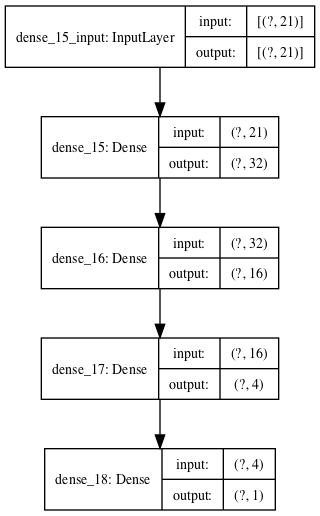

In [66]:
model = build_model_with_sgd()

tf.keras.utils.plot_model(model, show_shapes=True)

In [70]:
training_histroy = model.fit(x_train,
                            y_train,
                            validation_split = 0.2,
                            epochs = 500,
                            batch_size = 100,
                            callbacks = [tensorboard_callback])

Epoch 1/500
14/14 [==============================] - 0s 9ms/step - loss: 93.0073 - mae: 7.9335 - mse: 93.0073 - val_loss: 92.0600 - val_mae: 7.7990 - val_mse: 92.0600
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 93.0221 - mae: 7.9259 - mse: 93.0221 - val_loss: 92.0603 - val_mae: 7.7992 - val_mse: 92.0603
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9896 - mae: 7.9268 - mse: 92.9896 - val_loss: 92.0627 - val_mae: 7.8009 - val_mse: 92.0627
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0066 - mae: 7.9313 - mse: 93.0066 - val_loss: 92.0631 - val_mae: 7.8012 - val_mse: 92.0631
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 93.0025 - mae: 7.9310 - mse: 93.0025 - val_loss: 92.0637 - val_mae: 7.8016 - val_mse: 92.0637
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0052 - mae: 7.9299 - mse: 93.0052 - val_loss: 92.0690 - val_mae: 7.8046 - val_mse: 92.069

14/14 [==============================] - 0s 3ms/step - loss: 93.0004 - mae: 7.9298 - mse: 93.0004 - val_loss: 92.0617 - val_mae: 7.8002 - val_mse: 92.0617
Epoch 49/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0052 - mae: 7.9338 - mse: 93.0052 - val_loss: 92.0581 - val_mae: 7.7972 - val_mse: 92.0581
Epoch 50/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9973 - mae: 7.9300 - mse: 92.9973 - val_loss: 92.0588 - val_mae: 7.7979 - val_mse: 92.0588
Epoch 51/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0037 - mae: 7.9302 - mse: 93.0037 - val_loss: 92.0568 - val_mae: 7.7959 - val_mse: 92.0568
Epoch 52/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0043 - mae: 7.9275 - mse: 93.0043 - val_loss: 92.0577 - val_mae: 7.7969 - val_mse: 92.0577
Epoch 53/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9916 - mae: 7.9271 - mse: 92.9916 - val_loss: 92.0589 - val_mae: 7.7980 - val_mse: 92.0589
Epoch

Epoch 97/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0012 - mae: 7.9403 - mse: 93.0012 - val_loss: 92.0688 - val_mae: 7.8045 - val_mse: 92.0688
Epoch 98/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0029 - mae: 7.9338 - mse: 93.0029 - val_loss: 92.0661 - val_mae: 7.8030 - val_mse: 92.0661
Epoch 99/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0053 - mae: 7.9342 - mse: 93.0053 - val_loss: 92.0624 - val_mae: 7.8007 - val_mse: 92.0624
Epoch 100/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9984 - mae: 7.9258 - mse: 92.9984 - val_loss: 92.0642 - val_mae: 7.8019 - val_mse: 92.0642
Epoch 101/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0072 - mae: 7.9306 - mse: 93.0072 - val_loss: 92.0672 - val_mae: 7.8036 - val_mse: 92.0672
Epoch 102/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0035 - mae: 7.9334 - mse: 93.0035 - val_loss: 92.0639 - val_mae: 7.8017 - val_ms

14/14 [==============================] - 0s 3ms/step - loss: 92.9900 - mae: 7.9286 - mse: 92.9900 - val_loss: 92.0602 - val_mae: 7.7991 - val_mse: 92.0602
Epoch 146/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0098 - mae: 7.9284 - mse: 93.0098 - val_loss: 92.0626 - val_mae: 7.8008 - val_mse: 92.0626
Epoch 147/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9997 - mae: 7.9296 - mse: 92.9997 - val_loss: 92.0642 - val_mae: 7.8019 - val_mse: 92.0642
Epoch 148/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9952 - mae: 7.9298 - mse: 92.9952 - val_loss: 92.0648 - val_mae: 7.8022 - val_mse: 92.0648
Epoch 149/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9957 - mae: 7.9338 - mse: 92.9957 - val_loss: 92.0649 - val_mae: 7.8023 - val_mse: 92.0649
Epoch 150/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9960 - mae: 7.9354 - mse: 92.9960 - val_loss: 92.0616 - val_mae: 7.8002 - val_mse: 92.0616


14/14 [==============================] - 0s 3ms/step - loss: 93.0047 - mae: 7.9289 - mse: 93.0047 - val_loss: 92.0657 - val_mae: 7.8028 - val_mse: 92.0657
Epoch 194/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0107 - mae: 7.9317 - mse: 93.0107 - val_loss: 92.0633 - val_mae: 7.8013 - val_mse: 92.0633
Epoch 195/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9995 - mae: 7.9293 - mse: 92.9995 - val_loss: 92.0626 - val_mae: 7.8009 - val_mse: 92.0626
Epoch 196/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0032 - mae: 7.9344 - mse: 93.0032 - val_loss: 92.0606 - val_mae: 7.7994 - val_mse: 92.0606
Epoch 197/500
14/14 [==============================] - 0s 2ms/step - loss: 93.0026 - mae: 7.9304 - mse: 93.0026 - val_loss: 92.0614 - val_mae: 7.8001 - val_mse: 92.0614
Epoch 198/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9959 - mae: 7.9294 - mse: 92.9959 - val_loss: 92.0629 - val_mae: 7.8010 - val_mse: 92.0629


14/14 [==============================] - 0s 3ms/step - loss: 93.0012 - mae: 7.9362 - mse: 93.0012 - val_loss: 92.0620 - val_mae: 7.8005 - val_mse: 92.0620
Epoch 242/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0042 - mae: 7.9306 - mse: 93.0042 - val_loss: 92.0613 - val_mae: 7.7999 - val_mse: 92.0613
Epoch 243/500
14/14 [==============================] - 0s 2ms/step - loss: 92.9975 - mae: 7.9262 - mse: 92.9975 - val_loss: 92.0632 - val_mae: 7.8013 - val_mse: 92.0632
Epoch 244/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0211 - mae: 7.9290 - mse: 93.0211 - val_loss: 92.0660 - val_mae: 7.8030 - val_mse: 92.0660
Epoch 245/500
14/14 [==============================] - 0s 7ms/step - loss: 92.9934 - mae: 7.9313 - mse: 92.9934 - val_loss: 92.0642 - val_mae: 7.8019 - val_mse: 92.0642
Epoch 246/500
14/14 [==============================] - 0s 6ms/step - loss: 93.0018 - mae: 7.9338 - mse: 93.0018 - val_loss: 92.0624 - val_mae: 7.8008 - val_mse: 92.0624


14/14 [==============================] - 0s 3ms/step - loss: 93.0079 - mae: 7.9300 - mse: 93.0079 - val_loss: 92.0618 - val_mae: 7.8003 - val_mse: 92.0618
Epoch 290/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9963 - mae: 7.9333 - mse: 92.9963 - val_loss: 92.0590 - val_mae: 7.7981 - val_mse: 92.0590
Epoch 291/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9968 - mae: 7.9266 - mse: 92.9968 - val_loss: 92.0598 - val_mae: 7.7987 - val_mse: 92.0598
Epoch 292/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0035 - mae: 7.9251 - mse: 93.0035 - val_loss: 92.0619 - val_mae: 7.8003 - val_mse: 92.0619
Epoch 293/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0045 - mae: 7.9302 - mse: 93.0045 - val_loss: 92.0581 - val_mae: 7.7973 - val_mse: 92.0581
Epoch 294/500
14/14 [==============================] - 0s 2ms/step - loss: 93.0091 - mae: 7.9227 - mse: 93.0091 - val_loss: 92.0636 - val_mae: 7.8015 - val_mse: 92.0636


14/14 [==============================] - 0s 3ms/step - loss: 93.0129 - mae: 7.9294 - mse: 93.0129 - val_loss: 92.0602 - val_mae: 7.7991 - val_mse: 92.0602
Epoch 338/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9957 - mae: 7.9325 - mse: 92.9957 - val_loss: 92.0587 - val_mae: 7.7978 - val_mse: 92.0587
Epoch 339/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9957 - mae: 7.9292 - mse: 92.9957 - val_loss: 92.0589 - val_mae: 7.7980 - val_mse: 92.0589
Epoch 340/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0130 - mae: 7.9287 - mse: 93.0130 - val_loss: 92.0584 - val_mae: 7.7976 - val_mse: 92.0584
Epoch 341/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9922 - mae: 7.9267 - mse: 92.9922 - val_loss: 92.0594 - val_mae: 7.7985 - val_mse: 92.0594
Epoch 342/500
14/14 [==============================] - 0s 2ms/step - loss: 92.9941 - mae: 7.9291 - mse: 92.9941 - val_loss: 92.0584 - val_mae: 7.7975 - val_mse: 92.0583


14/14 [==============================] - 0s 3ms/step - loss: 93.0042 - mae: 7.9316 - mse: 93.0042 - val_loss: 92.0617 - val_mae: 7.8003 - val_mse: 92.0617
Epoch 386/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0027 - mae: 7.9304 - mse: 93.0027 - val_loss: 92.0612 - val_mae: 7.7999 - val_mse: 92.0612
Epoch 387/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0115 - mae: 7.9324 - mse: 93.0115 - val_loss: 92.0604 - val_mae: 7.7992 - val_mse: 92.0604
Epoch 388/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9977 - mae: 7.9320 - mse: 92.9977 - val_loss: 92.0603 - val_mae: 7.7992 - val_mse: 92.0603
Epoch 389/500
14/14 [==============================] - 0s 4ms/step - loss: 93.0054 - mae: 7.9242 - mse: 93.0054 - val_loss: 92.0642 - val_mae: 7.8019 - val_mse: 92.0642
Epoch 390/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0064 - mae: 7.9341 - mse: 93.0065 - val_loss: 92.0621 - val_mae: 7.8005 - val_mse: 92.0621


14/14 [==============================] - 0s 3ms/step - loss: 93.0113 - mae: 7.9370 - mse: 93.0113 - val_loss: 92.0662 - val_mae: 7.8031 - val_mse: 92.0662
Epoch 434/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0020 - mae: 7.9343 - mse: 93.0020 - val_loss: 92.0643 - val_mae: 7.8020 - val_mse: 92.0643
Epoch 435/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9940 - mae: 7.9314 - mse: 92.9940 - val_loss: 92.0666 - val_mae: 7.8033 - val_mse: 92.0666
Epoch 436/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0039 - mae: 7.9314 - mse: 93.0039 - val_loss: 92.0646 - val_mae: 7.8021 - val_mse: 92.0646
Epoch 437/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0004 - mae: 7.9292 - mse: 93.0004 - val_loss: 92.0676 - val_mae: 7.8038 - val_mse: 92.0676
Epoch 438/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9944 - mae: 7.9317 - mse: 92.9944 - val_loss: 92.0681 - val_mae: 7.8041 - val_mse: 92.0681


14/14 [==============================] - 0s 3ms/step - loss: 93.0071 - mae: 7.9300 - mse: 93.0071 - val_loss: 92.0676 - val_mae: 7.8038 - val_mse: 92.0676
Epoch 482/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9991 - mae: 7.9334 - mse: 92.9991 - val_loss: 92.0661 - val_mae: 7.8030 - val_mse: 92.0661
Epoch 483/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0018 - mae: 7.9368 - mse: 93.0018 - val_loss: 92.0620 - val_mae: 7.8004 - val_mse: 92.0620
Epoch 484/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0021 - mae: 7.9292 - mse: 93.0021 - val_loss: 92.0650 - val_mae: 7.8024 - val_mse: 92.0650
Epoch 485/500
14/14 [==============================] - 0s 3ms/step - loss: 93.0055 - mae: 7.9389 - mse: 93.0055 - val_loss: 92.0612 - val_mae: 7.7999 - val_mse: 92.0612
Epoch 486/500
14/14 [==============================] - 0s 3ms/step - loss: 92.9971 - mae: 7.9329 - mse: 92.9971 - val_loss: 92.0599 - val_mae: 7.7989 - val_mse: 92.0599


In [68]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 601us/step - loss: 90.4789 - mae: 7.8748 - mse: 90.4789


[90.47891998291016, 7.874762535095215, 90.47891998291016]

In [69]:
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

-0.0023389439485872465

In [71]:
def build_model_with_rmsprop():
    model = keras.Sequential([layers.Dense(16, 
                                           input_shape = (x_train.shape[1],),
                                          activation = 'elu'),
                             layers.Dense(8, activation = 'elu'),
                             layers.Dense(4, activation = 'elu'),
                             layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01)
    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
    return model

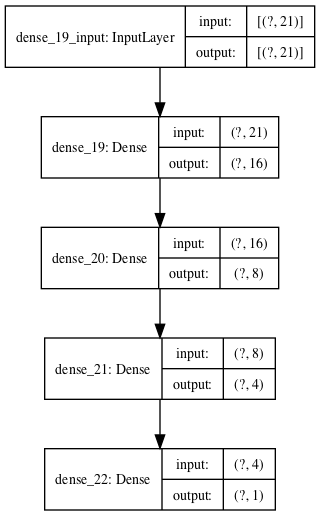

In [72]:
model = build_model_with_rmsprop()

tf.keras.utils.plot_model(model, show_shapes=True)

In [75]:
training_histroy = model.fit(x_train,
                            y_train,
                            validation_split = 0.2,
                            epochs = 100,
                            batch_size = 100,
                            callbacks = [tensorboard_callback])

Epoch 1/100
14/14 [==============================] - 0s 15ms/step - loss: 4009.9512 - mae: 62.7936 - mse: 4009.9512 - val_loss: 2915.0732 - val_mae: 53.4421 - val_mse: 2915.0732
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 1800.0778 - mae: 39.7547 - mse: 1800.0778 - val_loss: 659.1583 - val_mae: 22.7672 - val_mse: 659.1583
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 276.4158 - mae: 13.0508 - mse: 276.4158 - val_loss: 105.0584 - val_mae: 7.6031 - val_mse: 105.0584
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 82.7000 - mae: 6.5664 - mse: 82.7000 - val_loss: 60.6422 - val_mae: 5.9912 - val_mse: 60.6422
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 48.8116 - mae: 5.0655 - mse: 48.8116 - val_loss: 34.9625 - val_mae: 4.2717 - val_mse: 34.9625
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 37.4798 - mae: 4.5594 - mse: 37.4798 - val_loss: 27.8465 - val_mae: 

14/14 [==============================] - 0s 2ms/step - loss: 11.0618 - mae: 2.6082 - mse: 11.0618 - val_loss: 11.7189 - val_mae: 2.5414 - val_mse: 11.7189
Epoch 49/100
14/14 [==============================] - 0s 3ms/step - loss: 12.0554 - mae: 2.6576 - mse: 12.0554 - val_loss: 10.6260 - val_mae: 2.3746 - val_mse: 10.6260
Epoch 50/100
14/14 [==============================] - 0s 2ms/step - loss: 11.8882 - mae: 2.6564 - mse: 11.8882 - val_loss: 8.8120 - val_mae: 2.1157 - val_mse: 8.8120
Epoch 51/100
14/14 [==============================] - 0s 2ms/step - loss: 12.1865 - mae: 2.7366 - mse: 12.1865 - val_loss: 12.0379 - val_mae: 2.6845 - val_mse: 12.0379
Epoch 52/100
14/14 [==============================] - 0s 3ms/step - loss: 10.5834 - mae: 2.5150 - mse: 10.5834 - val_loss: 13.5831 - val_mae: 2.8511 - val_mse: 13.5831
Epoch 53/100
14/14 [==============================] - 0s 3ms/step - loss: 13.0803 - mae: 2.9049 - mse: 13.0803 - val_loss: 9.2365 - val_mae: 2.2614 - val_mse: 9.2365
Epoch 54/

14/14 [==============================] - 0s 2ms/step - loss: 8.9612 - mae: 2.3054 - mse: 8.9612 - val_loss: 9.5050 - val_mae: 2.3655 - val_mse: 9.5050
Epoch 98/100
14/14 [==============================] - 0s 2ms/step - loss: 8.3306 - mae: 2.1658 - mse: 8.3306 - val_loss: 6.9476 - val_mae: 1.8798 - val_mse: 6.9476
Epoch 99/100
14/14 [==============================] - 0s 2ms/step - loss: 8.8746 - mae: 2.3423 - mse: 8.8746 - val_loss: 8.3593 - val_mae: 2.1510 - val_mse: 8.3593
Epoch 100/100
14/14 [==============================] - 0s 2ms/step - loss: 10.8567 - mae: 2.6258 - mse: 10.8567 - val_loss: 7.0737 - val_mae: 1.9879 - val_mse: 7.0737


In [76]:
model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

14/14 [==============================] - 0s 578us/step - loss: 8.2706 - mae: 2.1180 - mse: 8.2706


0.9083774259760486